### Prepare GTSRB train and test DataLoaders for training and testing

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from utils.gtsrb_dataset import GTSRBDataset
from models.tsr_cnn import TSRNet
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from tqdm import tqdm 
import random
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Datasets & loaders
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, translate=(0.1,0.1)),
    transforms.ColorJitter(0.2,0.2,0.2),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])


train_dataset = GTSRBDataset(csv_file="./data/Train.csv", root_dir="./data/", transform=transform_train)
test_dataset  = GTSRBDataset(csv_file="./data/Test.csv",  root_dir="./data/", transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'Could not load this library: /data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


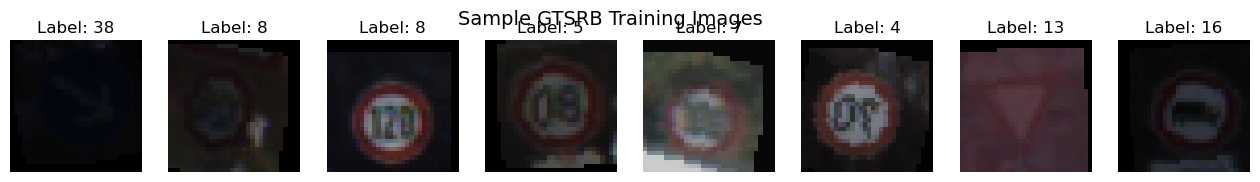

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch
images, labels = next(iter(train_loader))

# Denormalize from [-1, 1] → [0, 1]
images = images * 0.5 + 0.5  

# Pick how many to show
num_images = 8

fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))
for i in range(num_images):
    img = images[i].permute(1, 2, 0).numpy()
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis("off")

plt.suptitle("Sample GTSRB Training Images", fontsize=14)
plt.show()

### Train CNN-based traffic sign recognition model on the GTSRB dataset 

In [ ]:
from utils.train_tsr import train_tsr
from models.tsr_cnn import TSRNet
from torch.utils.data import DataLoader
from torchvision import transforms
from utils.gtsrb_dataset import GTSRBDataset

# Model
model = TSRNet(num_classes=43).to(device)

# Train
model, best_acc = train_tsr(model, train_loader, test_loader, device, num_epochs=70,ckpt_dir="results/checkpoints/tsr")


Epoch 1/50:   0%|          | 3/613 [00:00<00:27, 22.00it/s]

Epoch 1/50: 100%|██████████| 613/613 [00:23<00:00, 26.11it/s]


Epoch [1/50] Loss: 3.1365 | Train Acc: 13.20%
 Test Accuracy: 18.78%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 2/50: 100%|██████████| 613/613 [00:25<00:00, 24.35it/s]


Epoch [2/50] Loss: 2.7507 | Train Acc: 20.29%
 Test Accuracy: 27.84%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 3/50: 100%|██████████| 613/613 [00:21<00:00, 27.89it/s]


Epoch [3/50] Loss: 2.4280 | Train Acc: 26.34%
 Test Accuracy: 37.96%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 4/50: 100%|██████████| 613/613 [00:22<00:00, 27.29it/s]


Epoch [4/50] Loss: 2.1675 | Train Acc: 32.01%
 Test Accuracy: 41.97%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 5/50: 100%|██████████| 613/613 [00:22<00:00, 27.74it/s]


Epoch [5/50] Loss: 1.9740 | Train Acc: 36.14%
 Test Accuracy: 43.08%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 6/50: 100%|██████████| 613/613 [00:21<00:00, 28.62it/s]


Epoch [6/50] Loss: 1.8255 | Train Acc: 39.59%
 Test Accuracy: 45.16%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 7/50: 100%|██████████| 613/613 [00:21<00:00, 28.71it/s]


Epoch [7/50] Loss: 1.7187 | Train Acc: 42.25%
 Test Accuracy: 47.43%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 8/50: 100%|██████████| 613/613 [00:21<00:00, 28.96it/s]


Epoch [8/50] Loss: 1.6360 | Train Acc: 44.75%
 Test Accuracy: 48.99%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 9/50: 100%|██████████| 613/613 [00:23<00:00, 25.83it/s]


Epoch [9/50] Loss: 1.5613 | Train Acc: 46.63%
 Test Accuracy: 53.78%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 10/50: 100%|██████████| 613/613 [00:22<00:00, 27.78it/s]


Epoch [10/50] Loss: 1.4930 | Train Acc: 49.03%
 Test Accuracy: 55.72%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 11/50: 100%|██████████| 613/613 [00:23<00:00, 26.15it/s]


Epoch [11/50] Loss: 1.4160 | Train Acc: 51.77%
 Test Accuracy: 60.93%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 12/50: 100%|██████████| 613/613 [00:26<00:00, 22.99it/s]


Epoch [12/50] Loss: 1.3514 | Train Acc: 53.94%
 Test Accuracy: 63.45%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 13/50: 100%|██████████| 613/613 [00:25<00:00, 24.10it/s]


Epoch [13/50] Loss: 1.2934 | Train Acc: 56.19%
 Test Accuracy: 66.86%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 14/50: 100%|██████████| 613/613 [00:24<00:00, 24.60it/s]


Epoch [14/50] Loss: 1.2138 | Train Acc: 58.89%
 Test Accuracy: 66.96%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 15/50: 100%|██████████| 613/613 [00:24<00:00, 24.97it/s]


Epoch [15/50] Loss: 1.1578 | Train Acc: 60.79%
 Test Accuracy: 72.22%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 16/50: 100%|██████████| 613/613 [00:26<00:00, 23.17it/s]


Epoch [16/50] Loss: 1.0999 | Train Acc: 62.93%
 Test Accuracy: 75.27%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 17/50: 100%|██████████| 613/613 [00:26<00:00, 22.74it/s]


Epoch [17/50] Loss: 1.0489 | Train Acc: 64.66%
 Test Accuracy: 76.91%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 18/50: 100%|██████████| 613/613 [00:25<00:00, 23.58it/s]


Epoch [18/50] Loss: 0.9936 | Train Acc: 66.61%
 Test Accuracy: 77.92%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 19/50: 100%|██████████| 613/613 [00:26<00:00, 23.43it/s]


Epoch [19/50] Loss: 0.9566 | Train Acc: 67.73%
 Test Accuracy: 79.42%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 20/50: 100%|██████████| 613/613 [00:26<00:00, 23.52it/s]


Epoch [20/50] Loss: 0.9195 | Train Acc: 69.17%
 Test Accuracy: 80.41%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 21/50: 100%|██████████| 613/613 [00:26<00:00, 23.39it/s]


Epoch [21/50] Loss: 0.8890 | Train Acc: 69.93%
 Test Accuracy: 82.04%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 22/50: 100%|██████████| 613/613 [00:26<00:00, 23.43it/s]


Epoch [22/50] Loss: 0.8548 | Train Acc: 71.32%
 Test Accuracy: 83.29%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 23/50: 100%|██████████| 613/613 [00:23<00:00, 26.48it/s]


Epoch [23/50] Loss: 0.8307 | Train Acc: 72.09%
 Test Accuracy: 84.13%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 24/50: 100%|██████████| 613/613 [00:26<00:00, 23.57it/s]


Epoch [24/50] Loss: 0.8017 | Train Acc: 73.18%
 Test Accuracy: 84.99%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 25/50: 100%|██████████| 613/613 [00:26<00:00, 23.49it/s]


Epoch [25/50] Loss: 0.7795 | Train Acc: 73.93%
 Test Accuracy: 84.82%


Epoch 26/50: 100%|██████████| 613/613 [00:25<00:00, 23.99it/s]


Epoch [26/50] Loss: 0.7466 | Train Acc: 74.87%
 Test Accuracy: 85.93%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 27/50: 100%|██████████| 613/613 [00:24<00:00, 25.46it/s]


Epoch [27/50] Loss: 0.7477 | Train Acc: 74.84%
 Test Accuracy: 87.16%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 28/50: 100%|██████████| 613/613 [00:23<00:00, 25.65it/s]


Epoch [28/50] Loss: 0.7155 | Train Acc: 76.19%
 Test Accuracy: 87.32%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 29/50: 100%|██████████| 613/613 [00:26<00:00, 23.49it/s]


Epoch [29/50] Loss: 0.7009 | Train Acc: 76.87%
 Test Accuracy: 88.18%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 30/50: 100%|██████████| 613/613 [00:27<00:00, 22.64it/s]


Epoch [30/50] Loss: 0.6920 | Train Acc: 77.23%
 Test Accuracy: 88.69%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 31/50: 100%|██████████| 613/613 [00:28<00:00, 21.84it/s]


Epoch [31/50] Loss: 0.6735 | Train Acc: 77.75%
 Test Accuracy: 88.99%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 32/50: 100%|██████████| 613/613 [00:25<00:00, 23.61it/s]


Epoch [32/50] Loss: 0.6582 | Train Acc: 78.20%
 Test Accuracy: 89.31%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 33/50: 100%|██████████| 613/613 [00:24<00:00, 24.67it/s]


Epoch [33/50] Loss: 0.6525 | Train Acc: 78.58%
 Test Accuracy: 89.33%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 34/50: 100%|██████████| 613/613 [00:26<00:00, 23.23it/s]


Epoch [34/50] Loss: 0.6327 | Train Acc: 79.26%
 Test Accuracy: 89.56%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 35/50: 100%|██████████| 613/613 [00:25<00:00, 23.66it/s]


Epoch [35/50] Loss: 0.6213 | Train Acc: 79.70%
 Test Accuracy: 90.51%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 36/50: 100%|██████████| 613/613 [00:27<00:00, 22.53it/s]


Epoch [36/50] Loss: 0.6090 | Train Acc: 79.96%
 Test Accuracy: 90.92%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 37/50: 100%|██████████| 613/613 [00:23<00:00, 25.64it/s]


Epoch [37/50] Loss: 0.5959 | Train Acc: 80.46%
 Test Accuracy: 91.23%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 38/50: 100%|██████████| 613/613 [00:24<00:00, 25.09it/s]


Epoch [38/50] Loss: 0.5872 | Train Acc: 80.94%
 Test Accuracy: 91.29%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 39/50: 100%|██████████| 613/613 [00:23<00:00, 25.66it/s]


Epoch [39/50] Loss: 0.5724 | Train Acc: 81.13%
 Test Accuracy: 91.89%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 40/50: 100%|██████████| 613/613 [00:21<00:00, 27.89it/s]


Epoch [40/50] Loss: 0.5635 | Train Acc: 81.51%
 Test Accuracy: 92.15%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 41/50: 100%|██████████| 613/613 [00:22<00:00, 26.85it/s]


Epoch [41/50] Loss: 0.5606 | Train Acc: 81.64%
 Test Accuracy: 92.43%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 42/50: 100%|██████████| 613/613 [00:21<00:00, 29.11it/s]


Epoch [42/50] Loss: 0.5463 | Train Acc: 82.07%
 Test Accuracy: 91.46%


Epoch 43/50: 100%|██████████| 613/613 [00:20<00:00, 30.61it/s]


Epoch [43/50] Loss: 0.5444 | Train Acc: 82.21%
 Test Accuracy: 91.44%


Epoch 44/50: 100%|██████████| 613/613 [00:23<00:00, 26.17it/s]


Epoch [44/50] Loss: 0.5332 | Train Acc: 82.45%
 Test Accuracy: 92.08%


Epoch 45/50: 100%|██████████| 613/613 [00:21<00:00, 28.00it/s]


Epoch [45/50] Loss: 0.5176 | Train Acc: 83.01%
 Test Accuracy: 91.92%


Epoch 46/50: 100%|██████████| 613/613 [00:20<00:00, 29.86it/s]


Epoch [46/50] Loss: 0.5307 | Train Acc: 82.72%
 Test Accuracy: 92.41%
Early stopping triggered.
Training complete. Best Test Accuracy: 92.43%


### Loads a trained TSRNet, evaluates clean accuracy and robustness to FGSM/PGD and adversarial patch attack.

In [5]:
from models.tsr_cnn import TSRNet
from utils.attack_eval import evaluate_clean, evaluate_fgsm, evaluate_pgd, evaluate_patch
from utils.attacks import train_adversarial_patch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Datasets & loaders
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train_dataset = GTSRBDataset(csv_file="./data/Train.csv", root_dir="./data/", transform=transform)
test_dataset  = GTSRBDataset(csv_file="./data/Test.csv",  root_dir="./data/", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)
# Load TSR model
model = TSRNet(num_classes=43).to(device)
ckpt = torch.load("results/checkpoints/tsr/tsr_best_model.pth", map_location=device)
model.load_state_dict(ckpt['model_state_dict'])
model.eval()

# Evaluate clean accuracy
clean_acc = evaluate_clean(model, test_loader, device)
print("Clean Accuracy:", clean_acc)

# FGSM
eps = 0.03
adv_acc, asr = evaluate_fgsm(model, test_loader, device, eps)
print(f"FGSM Adv Acc: {adv_acc:.2f}%, ASR: {asr:.2f}%")

# PGD
adv_acc, asr = evaluate_pgd(model, test_loader, device, eps, alpha=0.007, iters=20)
print(f"PGD Adv Acc: {adv_acc:.2f}%, ASR: {asr:.2f}%")

# Train and evaluate patch attack
patch = train_adversarial_patch(model, train_loader, device, num_epochs=2 , patch_size=0.18, lr=0.05)
res = evaluate_patch(model, test_loader, patch, device, patch_size=0.18)
print("Patch attack eval:", res)

Clean Accuracy: 92.43072050673001
FGSM Adv Acc: 36.31%, ASR: 60.72%
PGD Adv Acc: 18.61%, ASR: 79.86%
[Patch train] Epoch 1/2, loss: -1.4893
Patch attack eval: {'clean_acc': 92.43072050673001, 'adv_acc': 58.764845605700714, 'asr': 37.36508480383759}


### Trains an Autoencoder on GTSRB data, evaluates reconstruction loss.

In [14]:
from utils.train_autoencoder import train_autoencoder
from models.autoencoder import Autoencoder, load_checkpoint
from utils.visualization import save_sample_with_metrics  # optional
from torch.utils.data import DataLoader
from torchvision import transforms

# Cell: train
model, best_loss, best_ckpt = train_autoencoder(
    train_loader, test_loader, device,
    latent_dim=512, num_epochs=20, lr=1e-3, ckpt_dir="results/checkpoints/autoencoder"
)
print("Best checkpoint:", best_ckpt)

Train Epoch 1/20: 100%|██████████| 613/613 [00:23<00:00, 26.08it/s]


[Epoch 1/20] Train Loss: 0.070164 | Test Loss: 0.034367
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 2/20: 100%|██████████| 613/613 [00:25<00:00, 24.12it/s]


[Epoch 2/20] Train Loss: 0.030933 | Test Loss: 0.023539
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 3/20: 100%|██████████| 613/613 [00:23<00:00, 26.26it/s]


[Epoch 3/20] Train Loss: 0.023622 | Test Loss: 0.018938
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 4/20: 100%|██████████| 613/613 [00:23<00:00, 26.42it/s]


[Epoch 4/20] Train Loss: 0.019698 | Test Loss: 0.015796
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 5/20: 100%|██████████| 613/613 [00:22<00:00, 27.32it/s]


[Epoch 5/20] Train Loss: 0.016957 | Test Loss: 0.013795
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 6/20: 100%|██████████| 613/613 [00:25<00:00, 23.75it/s]


[Epoch 6/20] Train Loss: 0.015301 | Test Loss: 0.012557
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 7/20: 100%|██████████| 613/613 [00:26<00:00, 22.88it/s]


[Epoch 7/20] Train Loss: 0.013863 | Test Loss: 0.012295
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 8/20: 100%|██████████| 613/613 [00:25<00:00, 23.70it/s]


[Epoch 8/20] Train Loss: 0.012983 | Test Loss: 0.010480
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 9/20: 100%|██████████| 613/613 [00:22<00:00, 27.35it/s]


[Epoch 9/20] Train Loss: 0.012226 | Test Loss: 0.011642


Train Epoch 10/20: 100%|██████████| 613/613 [00:24<00:00, 24.71it/s]


[Epoch 10/20] Train Loss: 0.011598 | Test Loss: 0.013273


Train Epoch 11/20: 100%|██████████| 613/613 [00:21<00:00, 28.75it/s]


[Epoch 11/20] Train Loss: 0.010964 | Test Loss: 0.008463
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 12/20: 100%|██████████| 613/613 [00:23<00:00, 26.30it/s]


[Epoch 12/20] Train Loss: 0.010403 | Test Loss: 0.008118
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 13/20: 100%|██████████| 613/613 [00:25<00:00, 24.09it/s]


[Epoch 13/20] Train Loss: 0.009906 | Test Loss: 0.008092
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 14/20: 100%|██████████| 613/613 [00:24<00:00, 25.49it/s]


[Epoch 14/20] Train Loss: 0.009647 | Test Loss: 0.008385


Train Epoch 15/20: 100%|██████████| 613/613 [00:24<00:00, 25.47it/s]


[Epoch 15/20] Train Loss: 0.009388 | Test Loss: 0.007542
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 16/20: 100%|██████████| 613/613 [00:22<00:00, 27.67it/s]


[Epoch 16/20] Train Loss: 0.008845 | Test Loss: 0.006852
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 17/20: 100%|██████████| 613/613 [00:24<00:00, 25.22it/s]


[Epoch 17/20] Train Loss: 0.008656 | Test Loss: 0.006817
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 18/20: 100%|██████████| 613/613 [00:23<00:00, 25.95it/s]


[Epoch 18/20] Train Loss: 0.008634 | Test Loss: 0.006711
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 19/20: 100%|██████████| 613/613 [00:23<00:00, 26.29it/s]


[Epoch 19/20] Train Loss: 0.008098 | Test Loss: 0.006673
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Train Epoch 20/20: 100%|██████████| 613/613 [00:23<00:00, 25.95it/s]


[Epoch 20/20] Train Loss: 0.007913 | Test Loss: 0.006185
Saved best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth
Training finished. Best test loss: 0.006184926082439844
Best checkpoint: results/checkpoints/autoencoder/autoencoder_best.pth


Loaded checkpoint from epoch 20
✅ Metrics on first 8 images:
Mean MSE: 0.0084
Mean PSNR: 26.75 dB
Mean SSIM: 0.9447
Mean LPIPS: 0.1130
Saved reconstruction comparison grid to results/samples/reconstruction_metrics.png


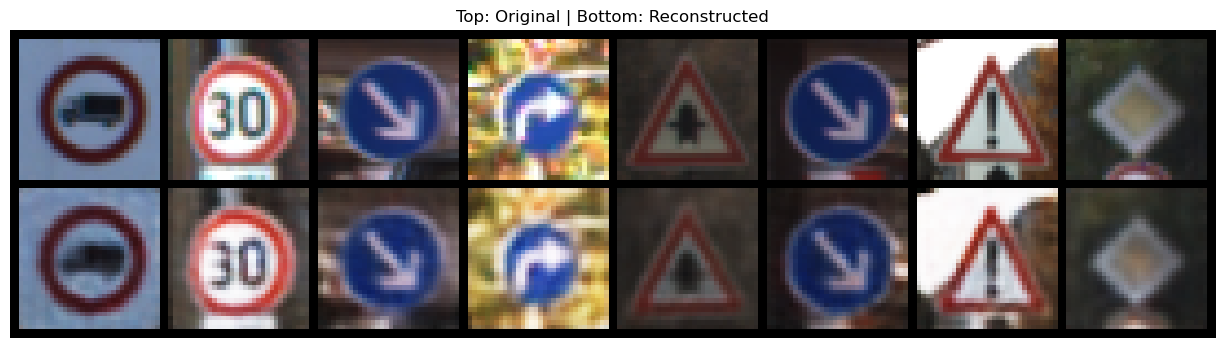

In [15]:
import importlib
import utils.visualization as visualization
importlib.reload(visualization)
from utils.visualization import save_sample_with_metrics
import models.autoencoder as autoencoder
importlib.reload(autoencoder)

from models.autoencoder import Autoencoder, load_checkpoint

model = Autoencoder(latent_dim=512).to(device)
load_checkpoint(model, optimizer=None, filename="results/checkpoints/autoencoder/autoencoder_best.pth", map_location=device)

save_sample_with_metrics(model, test_loader, device, save_path="results/samples/reconstruction_metrics.png", num_images=8)


### Train UNetWatermark + LatentDecoder to embed/recover latent features from images using pretrained Autoencoder

In [8]:
import importlib
import utils.train_unet_watermark as train_unet_watermark
importlib.reload(train_unet_watermark)
from utils.train_unet_watermark import train_unet_watermark
from torchvision import transforms
from torch.utils.data import DataLoader
from utils.gtsrb_dataset import GTSRBDataset

unet, latent_decoder, best_loss = train_unet_watermark(
    train_loader, device,
    autoencoder_ckpt="results/checkpoints/autoencoder/autoencoder_best.pth",
    latent_dim=512,
    num_epochs=50,
    lr=1e-4,
    ckpt_dir="results/checkpoints/unet"
)
print("Finished. Best perceptual loss:", best_loss)

Loaded checkpoint from epoch 20


/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
UNet Epoch 1/50: 100%|██████████| 613/613 [05:51<00:00,  1.74it/s]


[Epoch 1] Avg Total Loss: 48.579566
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 2/50: 100%|██████████| 613/613 [06:11<00:00,  1.65it/s]


[Epoch 2] Avg Total Loss: 27.306419
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 3/50: 100%|██████████| 613/613 [07:31<00:00,  1.36it/s]


[Epoch 3] Avg Total Loss: 22.983220
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 4/50: 100%|██████████| 613/613 [07:29<00:00,  1.36it/s]


[Epoch 4] Avg Total Loss: 21.044641
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 5/50: 100%|██████████| 613/613 [07:29<00:00,  1.36it/s]


[Epoch 5] Avg Total Loss: 20.139930
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 6/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 6] Avg Total Loss: 18.735805
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 7/50: 100%|██████████| 613/613 [07:28<00:00,  1.37it/s]


[Epoch 7] Avg Total Loss: 17.537282
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 8/50: 100%|██████████| 613/613 [07:31<00:00,  1.36it/s]


[Epoch 8] Avg Total Loss: 18.575788


UNet Epoch 9/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 9] Avg Total Loss: 18.062274


UNet Epoch 10/50: 100%|██████████| 613/613 [07:31<00:00,  1.36it/s]


[Epoch 10] Avg Total Loss: 17.661226


UNet Epoch 11/50: 100%|██████████| 613/613 [07:29<00:00,  1.36it/s]


[Epoch 11] Avg Total Loss: 17.669160


UNet Epoch 12/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 12] Avg Total Loss: 17.077545
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 13/50: 100%|██████████| 613/613 [07:38<00:00,  1.34it/s]


[Epoch 13] Avg Total Loss: 17.131372


UNet Epoch 14/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 14] Avg Total Loss: 16.847501
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 15/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 15] Avg Total Loss: 16.765326
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 16/50: 100%|██████████| 613/613 [07:32<00:00,  1.36it/s]


[Epoch 16] Avg Total Loss: 16.908561


UNet Epoch 17/50: 100%|██████████| 613/613 [07:34<00:00,  1.35it/s]


[Epoch 17] Avg Total Loss: 17.843120


UNet Epoch 18/50: 100%|██████████| 613/613 [07:35<00:00,  1.35it/s]


[Epoch 18] Avg Total Loss: 17.395390


UNet Epoch 19/50: 100%|██████████| 613/613 [07:31<00:00,  1.36it/s]


[Epoch 19] Avg Total Loss: 16.612735
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 20/50: 100%|██████████| 613/613 [08:32<00:00,  1.20it/s]


[Epoch 20] Avg Total Loss: 15.770264
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 21/50: 100%|██████████| 613/613 [09:53<00:00,  1.03it/s]


[Epoch 21] Avg Total Loss: 16.884440


UNet Epoch 22/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 22] Avg Total Loss: 16.570294


UNet Epoch 23/50: 100%|██████████| 613/613 [11:07<00:00,  1.09s/it]


[Epoch 23] Avg Total Loss: 17.426394


UNet Epoch 24/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 24] Avg Total Loss: 16.012129


UNet Epoch 25/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 25] Avg Total Loss: 16.721536


UNet Epoch 26/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 26] Avg Total Loss: 16.662025


UNet Epoch 27/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 27] Avg Total Loss: 16.081751


UNet Epoch 28/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 28] Avg Total Loss: 16.131556


UNet Epoch 29/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 29] Avg Total Loss: 15.527335
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 30/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 30] Avg Total Loss: 16.758968


UNet Epoch 31/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 31] Avg Total Loss: 16.069761


UNet Epoch 32/50: 100%|██████████| 613/613 [11:03<00:00,  1.08s/it]


[Epoch 32] Avg Total Loss: 16.193845


UNet Epoch 33/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 33] Avg Total Loss: 16.261393


UNet Epoch 34/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 34] Avg Total Loss: 17.064214


UNet Epoch 35/50: 100%|██████████| 613/613 [11:09<00:00,  1.09s/it]


[Epoch 35] Avg Total Loss: 17.175044


UNet Epoch 36/50: 100%|██████████| 613/613 [11:07<00:00,  1.09s/it]


[Epoch 36] Avg Total Loss: 16.961463


UNet Epoch 37/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 37] Avg Total Loss: 17.277852


UNet Epoch 38/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 38] Avg Total Loss: 15.319345
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 39/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 39] Avg Total Loss: 16.395186


UNet Epoch 40/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 40] Avg Total Loss: 16.191186


UNet Epoch 41/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 41] Avg Total Loss: 16.296838


UNet Epoch 42/50: 100%|██████████| 613/613 [11:16<00:00,  1.10s/it]


[Epoch 42] Avg Total Loss: 15.879432


UNet Epoch 43/50: 100%|██████████| 613/613 [11:09<00:00,  1.09s/it]


[Epoch 43] Avg Total Loss: 15.141769
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 44/50: 100%|██████████| 613/613 [09:48<00:00,  1.04it/s]


[Epoch 44] Avg Total Loss: 15.979967


UNet Epoch 45/50: 100%|██████████| 613/613 [05:48<00:00,  1.76it/s]


[Epoch 45] Avg Total Loss: 15.279536


UNet Epoch 46/50: 100%|██████████| 613/613 [05:46<00:00,  1.77it/s]


[Epoch 46] Avg Total Loss: 15.875990


UNet Epoch 47/50: 100%|██████████| 613/613 [05:49<00:00,  1.75it/s]


[Epoch 47] Avg Total Loss: 15.815418


UNet Epoch 48/50: 100%|██████████| 613/613 [05:47<00:00,  1.77it/s]


[Epoch 48] Avg Total Loss: 15.799076


UNet Epoch 49/50: 100%|██████████| 613/613 [07:48<00:00,  1.31it/s]


[Epoch 49] Avg Total Loss: 15.802085


UNet Epoch 50/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]

[Epoch 50] Avg Total Loss: 17.592897
Finished. Best perceptual loss: 15.141769123240355


In [9]:
import torch
from torchvision.utils import save_image, make_grid
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

from models.tsr_cnn import TSRNet
from models.autoencoder import Autoencoder, load_checkpoint
from models.unet_watermark import UNetWatermark
from models.latent_decoder import LatentDecoder
from utils.screen_shooting import ScreenShooting 
import importlib
import utils.metrics as metrics
importlib.reload(metrics)
from utils.metrics import psnr, ssim_batch, lpips_batch





@torch.no_grad()
def evaluate_unet_watermark(test_loader, device,
                            unet_ckpt="results/checkpoints/unet/unet_best.pth",
                            latent_decoder_ckpt="results/checkpoints/unet/latent_decoder_best.pth",
                            autoencoder_ckpt="results/checkpoints/autoencoder/autoencoder_best.pth",
                            tsr_ckpt="results/checkpoints/tsr/tsr_best_model.pth",
                            latent_dim=512,
                            save_dir="results/eval_samples",
                            shooting_prob=1):
    os.makedirs(save_dir, exist_ok=True)

    # -------------------------------
    # 1. Load Models
    # -------------------------------
    tsr_model = TSRNet(num_classes=43).to(device)
    ckpt = torch.load(tsr_ckpt, map_location=device)
    tsr_model.load_state_dict(ckpt["model_state_dict"], strict=False)
    tsr_model.eval()

    ae = Autoencoder(latent_dim=latent_dim).to(device)
    load_checkpoint(ae, None, autoencoder_ckpt, map_location=device)
    ae.eval()

    unet = UNetWatermark(latent_dim=latent_dim).to(device)
    unet_ckpt_data = torch.load(unet_ckpt, map_location=device)
    unet.load_state_dict(unet_ckpt_data["model_state"])
    unet.eval()

    latent_decoder = LatentDecoder(latent_dim=latent_dim).to(device)
    latent_ckpt_data = torch.load(latent_decoder_ckpt, map_location=device)
    latent_decoder.load_state_dict(latent_ckpt_data["model_state"])
    latent_decoder.eval()

    screen = ScreenShooting(apply_prob=shooting_prob).to(device)

    # -------------------------------
    # 2. Evaluation Metrics
    # -------------------------------
    correct, total = 0, 0
    psnr_total, ssim_total, lpips_total, count = 0.0, 0.0, 0.0, 0
 

    for imgs, labels in tqdm(test_loader, desc="Evaluating"):
        imgs, labels = imgs.to(device), labels.to(device)

        # Encode latent
        z = ae.encoder(imgs)

        # Watermark embedding
        Iw = unet(imgs, z)

        # Apply screen shooting distortion

        #Iw_shot = screen(Iw)

        # Decode latent and reconstruct
        z_pred = latent_decoder(Iw)
        recon = ae.decoder(z_pred)
        recon = torch.clamp(recon, -1, 1)

        # TSR classification accuracy
        outputs = tsr_model(recon)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        # ---- Compute perceptual metrics ----
        psnr_total += psnr(imgs, recon)
        ssim_total += ssim_batch(imgs, recon)
        lpips_total += lpips_batch(imgs, recon, device)
        count += 1

    # Average metrics
    acc = 100 * correct / total
    avg_psnr = psnr_total / count
    avg_ssim = ssim_total / count
    avg_lpips = lpips_total / count

    print(f"\n✅ TSR Accuracy: {acc:.2f}%")
    print(f"🔹 PSNR: {avg_psnr:.2f} dB")
    print(f"🔹 SSIM: {avg_ssim:.4f}")
    print(f"🔹 LPIPS: {avg_lpips:.4f}")

    # for imgs, labels in tqdm(test_loader, desc="Evaluating"):
    #     imgs, labels = imgs.to(device), labels.to(device)

    #     # Encode latent
    #     z, _ = ae(imgs)

    #     # Watermark embedding
    #     Iw = unet(imgs, z)

    #     # ✅ Apply screen shooting effect (robustness training)
    #     Iw_shot = screen(Iw)

    #         # Predict latent from the distorted image
    #     z_pred = latent_decoder(Iw_shot)

    #     # Reconstruct image from predicted latent
    #     recon = ae.decoder(z_pred)
    #     recon = torch.clamp(recon, -1, 1)

    #     # TSR accuracy on reconstructed images
    #     outputs = tsr_model(recon)
    #     _, preds = torch.max(outputs, 1)
    #     correct += (preds == labels).sum().item()
    #     total += labels.size(0)

    #     psnr_total += psnr(imgs.detach(), recon.detach())
    #     count += 1

    # acc = 100 * correct / total
    # avg_psnr = psnr_total / count
    # print(f"\nTSR Accuracy on reconstructed images: {acc:.2f}%")
    # print(f"Average PSNR: {avg_psnr:.2f} dB")

    # -------------------------------
    # 3. Visualization (one batch)
    # -------------------------------
    # imgs, _ = next(iter(test_loader))
    # imgs = imgs.to(device)[:8]
    # z, _ = ae(imgs)
    # Iw = unet(imgs, z)
    # z_pred = latent_decoder(Iw)
    # recon = ae.decoder(z_pred)

    # # Bring to [0,1] range for visualization
    # imgs_vis = (imgs + 1) / 2
    # Iw_vis = (Iw + 1) / 2
    # recon_vis = (recon + 1) / 2

    # grid = torch.cat([imgs_vis, Iw_vis, recon_vis], dim=0)
    # save_path = os.path.join(save_dir, "original_watermarked_reconstructed.png")
    # save_image(grid, save_path, nrow=8)
    # print(f"Saved comparison grid at: {save_path}")

    # # Optional: also show inline if running in notebook
    # grid_img = make_grid(grid, nrow=8)
    # plt.figure(figsize=(16, 6))
    # plt.imshow(grid_img.permute(1, 2, 0).cpu())
    # plt.axis("off")
    # plt.title("Top: Original | Middle: Watermarked | Bottom: Reconstructed")
    # plt.show()



    # -------------------------------
    # 3. Visualization (one batch)
    # -------------------------------
    imgs, _ = next(iter(test_loader))
    imgs = imgs.to(device)[:8]

    # Encode latent
    z= ae.encoder(imgs)

    # Generate watermarked image
    Iw = unet(imgs, z)

    # Apply screen shooting distortion
    Iw_shot = screen(Iw)
    print("Distortion difference:", torch.mean((Iw - Iw_shot) ** 2).item())

    # Decode latent and reconstruct
    z_pred = latent_decoder(Iw_shot)
    print(z_pred.shape)
    recon = ae.decoder(z_pred)



    z_random = torch.randn_like(z_pred)
    recon_random = ae .decoder(z_random)
    print("Random reconstruction difference", torch.mean((recon - recon_random)**2).item())


    #test
    latent_mse = torch.mean((z - z_pred) ** 2).item()
    print("Latent MSE:",latent_mse)

    # Bring to [0,1] range for visualization
    imgs_vis = (imgs + 1) / 2
    Iw_vis = (Iw + 1) / 2
    Iw_shot_vis = (Iw_shot + 1) / 2
    recon_vis = (recon + 1) / 2

    # Concatenate in order: Original → Watermarked → Distorted → Reconstructed
    grid = torch.cat([imgs_vis, Iw_vis, Iw_shot_vis, recon_vis], dim=0)
    # grid = torch.cat([imgs_vis, Iw_vis,  recon_vis], dim=0)

    save_path = os.path.join(save_dir, "original_watermarked_distorted_reconstructed.png")
    save_image(grid, save_path, nrow=8)
    print(f"Saved comparison grid at: {save_path}")

    # Optional: also show inline (if in Jupyter or Colab)
    grid_img = make_grid(grid, nrow=8)
    plt.figure(figsize=(16, 8))
    plt.imshow(grid_img.permute(1, 2, 0).cpu())
    plt.axis("off")
    plt.title("Top: Original | 2nd: Watermarked | 3rd: Distorted | Bottom: Reconstructed")
    plt.show()


Loaded checkpoint from epoch 20


Evaluating:   0%|          | 0/198 [00:00<?, ?it/s]

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Evaluating:   2%|▏         | 3/198 [00:01<01:17,  2.51it/s]

Loading model from: /data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/lpips/weights/v0.1/vgg.pth


Evaluating: 100%|██████████| 198/198 [00:15<00:00, 12.93it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0251963].



✅ TSR Accuracy: 87.58%
🔹 PSNR: 21.45 dB
🔹 SSIM: 0.8535
🔹 LPIPS: 0.1679
Distortion difference: 0.1182965636253357
torch.Size([8, 512])
Random reconstruction difference 0.22168147563934326
Latent MSE: 15.705452919006348
Saved comparison grid at: results/eval_samples/original_watermarked_distorted_reconstructed.png


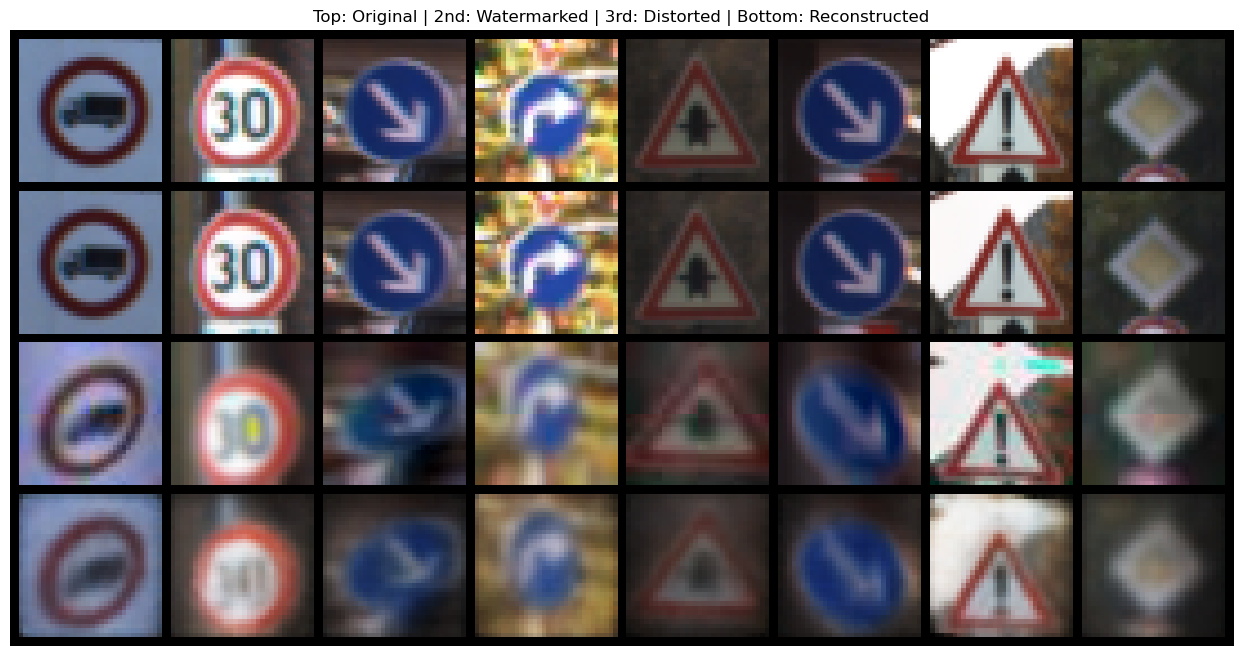

In [10]:
evaluate_unet_watermark(test_loader, device)


In [9]:
import importlib
import torch
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision.utils import save_image, make_grid
from models.tsr_cnn import TSRNet
from models.autoencoder import Autoencoder, load_checkpoint
from models.unet_watermark import UNetWatermark
from models.latent_decoder import LatentDecoder
from utils.screen_shooting import ScreenShooting 
import utils.metrics as metrics
importlib.reload(metrics)
from utils.metrics import psnr, ssim_batch, lpips_batch
@torch.no_grad()
def evaluate_unet_watermark(test_loader, device,
                            unet_ckpt="results/checkpoints/unet/unet_best.pth",
                            latent_decoder_ckpt="results/checkpoints/unet/latent_decoder_epoch43.pth",
                            autoencoder_ckpt="results/checkpoints/autoencoder/autoencoder_best.pth",
                            tsr_ckpt="results/checkpoints/tsr/tsr_best_model.pth",
                            latent_dim=512,
                            save_dir="results/eval_samples",
                            shooting_prob=0.7):
    os.makedirs(save_dir, exist_ok=True)

    # -------------------------------
    # 1. Load Models
    # -------------------------------
    tsr_model = TSRNet(num_classes=43).to(device)
    ckpt = torch.load(tsr_ckpt, map_location=device)
    tsr_model.load_state_dict(ckpt["model_state_dict"], strict=False)
    tsr_model.eval()

    ae = Autoencoder(latent_dim=latent_dim).to(device)
    load_checkpoint(ae, None, autoencoder_ckpt, map_location=device)
    ae.eval()

    unet = UNetWatermark(latent_dim=latent_dim).to(device)
    unet_ckpt_data = torch.load(unet_ckpt, map_location=device)
    unet.load_state_dict(unet_ckpt_data["model_state"])
    unet.eval()

    latent_decoder = LatentDecoder(latent_dim=latent_dim).to(device)
    latent_ckpt_data = torch.load(latent_decoder_ckpt, map_location=device)
    latent_decoder.load_state_dict(latent_ckpt_data["model_state"])
    latent_decoder.eval()

    screen = ScreenShooting(apply_prob=shooting_prob).to(device)

    # -------------------------------
    # 2. Evaluation Metrics
    # -------------------------------
    correct_recon, correct_distorted, total = 0, 0, 0
    psnr_total, ssim_total, lpips_total, count = 0.0, 0.0, 0.0, 0

    for imgs, labels in tqdm(test_loader, desc="Evaluating"):
        imgs, labels = imgs.to(device), labels.to(device)

        # Encode latent
        z, _ = ae(imgs)

        # Watermark embedding
        Iw = unet(imgs, z)

        # Apply screen shooting distortion
        Iw_shot = screen(Iw)

        # 🔹 TSR on distorted images (before reconstruction)
        outputs_distorted = tsr_model(Iw_shot)
        _, preds_distorted = torch.max(outputs_distorted, 1)
        correct_distorted += (preds_distorted == labels).sum().item()

        # Decode latent and reconstruct
        z_pred = latent_decoder(Iw_shot)
        recon = ae.decoder(z_pred)
        recon = torch.clamp(recon, -1, 1)

        # 🔹 TSR on reconstructed images (after decoding)
        outputs_recon = tsr_model(recon)
        _, preds_recon = torch.max(outputs_recon, 1)
        correct_recon += (preds_recon == labels).sum().item()

        total += labels.size(0)

        # ---- Compute perceptual metrics ----
        psnr_total += psnr(imgs, recon)
        ssim_total += ssim_batch(imgs, recon)
        lpips_total += lpips_batch(imgs, recon, device)
        count += 1

    # Average metrics
    acc_distorted = 100 * correct_distorted / total
    acc_recon = 100 * correct_recon / total
    avg_psnr = psnr_total / count
    avg_ssim = ssim_total / count
    avg_lpips = lpips_total / count

    print(f"\n✅ TSR Accuracy (Distorted): {acc_distorted:.2f}%")
    print(f"✅ TSR Accuracy (Reconstructed): {acc_recon:.2f}%")
    print(f"🔹 PSNR: {avg_psnr:.2f} dB")
    print(f"🔹 SSIM: {avg_ssim:.4f}")
    print(f"🔹 LPIPS: {avg_lpips:.4f}")

    # -------------------------------
    # 3. Visualization (one batch)
    # -------------------------------
    imgs, _ = next(iter(test_loader))
    imgs = imgs.to(device)[:8]

    # Encode latent
    z, _ = ae(imgs)
    Iw = unet(imgs, z)
    Iw_shot = screen(Iw)
    z_pred = latent_decoder(Iw_shot)
    recon = ae.decoder(z_pred)

    # Normalize for visualization
    imgs_vis = (imgs + 1) / 2
    Iw_vis = (Iw + 1) / 2
    Iw_shot_vis = (Iw_shot + 1) / 2
    recon_vis = (recon + 1) / 2

    grid = torch.cat([imgs_vis, Iw_vis, Iw_shot_vis, recon_vis], dim=0)
    save_path = os.path.join(save_dir, "original_watermarked_distorted_reconstructed.png")
    save_image(grid, save_path, nrow=8)
    print(f"✅ Saved comparison grid at: {save_path}")

    # Optional inline visualization
    grid_img = make_grid(grid, nrow=8)
    plt.figure(figsize=(16, 8))
    plt.imshow(grid_img.permute(1, 2, 0).cpu())
    plt.axis("off")
    plt.title("Top: Original | 2nd: Watermarked | 3rd: Distorted | Bottom: Reconstructed")
    plt.show()


Loaded checkpoint from epoch 20


Evaluating:   0%|          | 0/198 [00:00<?, ?it/s]

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


Evaluating:   2%|▏         | 3/198 [00:02<02:16,  1.43it/s]

Loading model from: /data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/lpips/weights/v0.1/vgg.pth


Evaluating: 100%|██████████| 198/198 [00:14<00:00, 13.72it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5754436..1.7309942].



✅ TSR Accuracy (Distorted): 3.41%
✅ TSR Accuracy (Reconstructed): 4.27%
🔹 PSNR: 10.40 dB
🔹 SSIM: 0.1142
🔹 LPIPS: 0.5957
✅ Saved comparison grid at: results/eval_samples/original_watermarked_distorted_reconstructed.png


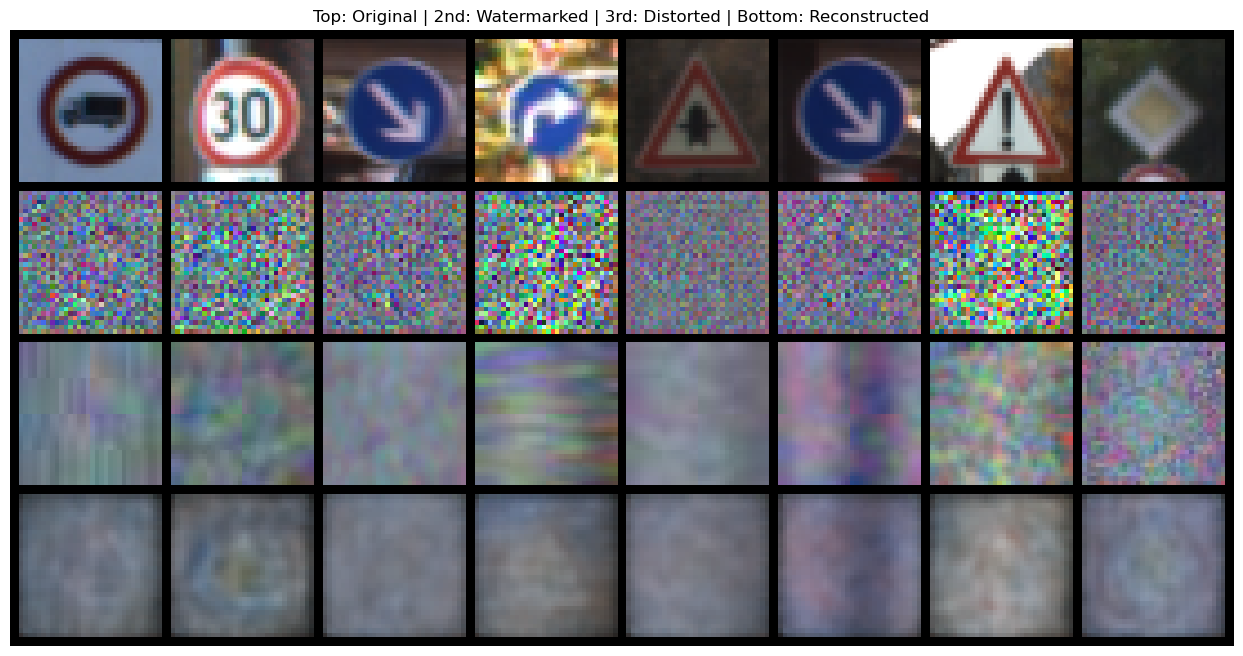

In [10]:
evaluate_unet_watermark(test_loader, device)


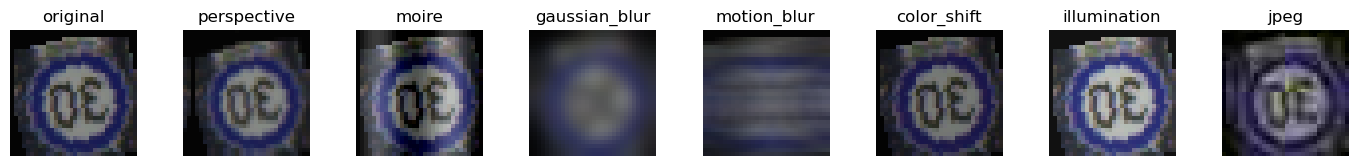

In [ ]:
import cv2
import matplotlib.pyplot as plt
import importlib
import utils.screen_shooting as screen_shooting
importlib.reload(screen_shooting)
from utils.screen_shooting import ScreenShooting

# Initialize distortion class
screen = ScreenShooting()

# --- Load a JPG image from the same folder ---
image_path = "12.jpg"  # 🔹 change to your image filename
img_np = cv2.imread(image_path)  # loads as BGR
if img_np is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Resize to match your model input if needed (optional)
# img_np = cv2.resize(img_np, (32, 32))

# --- Apply all distortions ---
effects = screen.apply_screen_effects_all(img_np)
effects = {"original": img_np, **effects}

# --- Visualize results ---
plt.figure(figsize=(16, 8))
for i, (name, eff_img) in enumerate(effects.items()):
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(eff_img, cv2.COLOR_BGR2RGB))
    plt.title(name, fontsize=12)
    plt.axis("off")
plt.tight_layout()
plt.show()
